## Rot3u Trajectory Planning


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import roboticstoolbox as rtb
from spatialmath import SE3
from roboticstoolbox import DHRobot, RevoluteDH
import math

In [5]:
# defining pi
pi = math.pi

### defining the  Robot

In [33]:
rot3u = DHRobot([
    RevoluteDH(a=0, alpha=0, d=0),
    RevoluteDH(a=0, alpha=pi / 2, d=0),
    RevoluteDH(a=10.5, alpha=pi, d=0),
    RevoluteDH(a=10, alpha=0, d=0),
    RevoluteDH(a=16.8, alpha=0, d=0)
],name="Rot3u")


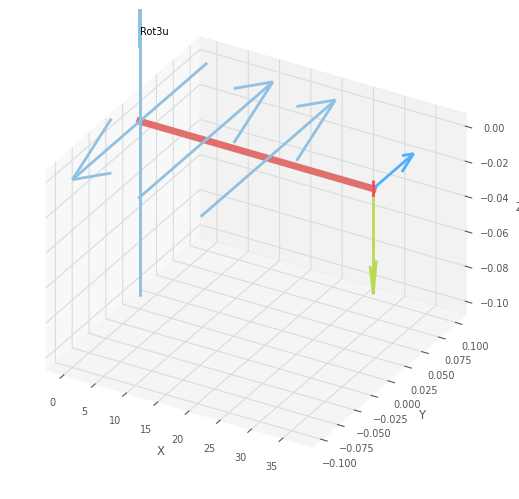

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Rot3u')

<Figure size 640x480 with 0 Axes>

In [36]:
rot3u.plot([math.radians(0), math.radians(0), math.radians(0), math.radians(0), math.radians(0)])

In [104]:
# import  the  image
import cv2

img = cv2.imread('./images/deer.png')
# plt.imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150)
kernel = np.ones((3, 3), np.uint8)
thinned_edges = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel, iterations=3) 
# Perform Hough line detection
lines = cv2.HoughLinesP(thinned_edges, 1, np.pi/180, 50, minLineLength=50, maxLineGap=10)
coordinates = []

# Draw detected lines on original image
for line in lines:
    x1, y1, x2, y2 = line[0]
    # Calculate line width (approximation)
    width = np.sqrt((x2 - x1)**2 + (y2 - y1)**2) 

    # Store line data
    coordinates.append([(x1, y1), (x2, y2)])

    # Draw line on original image
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    

            
for i, (start, end) in enumerate(coordinates):
    print(f"Line {i+1}: Start {start}, End {end}")

plt.imshow(img)
            


TypeError: 'NoneType' object is not iterable